In [1]:
!pip install --upgrade pip

Requirement already up-to-date: pip in /anaconda/lib/python3.6/site-packages (19.1.1)


In [2]:
import sys
sys.path.append("/anaconda/lib/python3.6/site-packages")

In [3]:
!brew install graphviz
!pip install pygraphviz --install-option="--include-path=/usr/local/include/graphviz/" \
--install-option="--library-path=/usr/local/lib/graphviz"

To reinstall 2.40.1, run `brew reinstall graphviz`
//anaconda/lib/python3.6/site-packages/pip/_internal/commands/install.py:244: UserWarning: Disabling all use of wheels due to the use of --build-options / --global-options / --install-options.
  cmdoptions.check_install_build_global(options)


In [4]:
from datascience import *
from IPython.display import Image
from bokeh.charts import HeatMap, output_file, show
import pygraphviz as PG
import numpy as np
%matplotlib inline

In [5]:
obs = Table().read_table('offeringsDrum.csv')

obs

section | offering           | utensil | material | decoration | count | number              | quantity | measurement | type of substance | position | occasion                | personnel | deity                    | time | day  | month    | text  | additional
3       | bread              | nan     | nan      | nan        | 1     | plural, unspecified | nan      | nan         | bread             | nan      | awakening of the temple | baker     | nan                      | nan  | 7    | Tashritu | TU 39 | nan
3       | roasted meat       | nan     | nan      | nan        | 1     | 1                   | nan      | nan         | meat              | nan      | regular offerings       | baker     | Papsukkal; Gushkingbanda | nan  | 7    | Tashritu | TU 39 | nan
3       | beef               | nan     | nan      | nan        | 1     | 1                   | nan      | nan         | meat              | nan      | regular offerings       | baker     | Papsukkal; Gushkingbanda | nan  | 7    | Tashritu | TU 39 | nan
3       | mutton             | nan     | nan      | nan        | 1     | 1                   | nan      | nan         | meat              | nan      | regular offerings       | baker     | Papsukkal; Gushkingbanda | nan  | 7    | Tashritu | TU 39 | nan
3       | first-quality beer | nan     | nan      | nan        | 1     | 1                   | nan      | nan         | beer              | nan      | not specified           | baker     | Papsukkal; Gushkingbanda | nan  | 7    | Tashritu | TU 39 | nan
3       | drawn wine         | nan     | nan      | nan        | 1     | 1                   | nan      | nan         | wine              | nan      | not specified           | baker     | Papsukkal; Gushkingbanda | nan  | 7    | Tashritu | TU 39 | nan
3       | milk               | nan     | nan      | nan        | 1     | 1                   | nan      | nan         | milk              | nan      | not specified           | baker     | Papsukkal; Gushkingbanda | nan  | 7    | Tashritu | TU 39 | nan
3       | date cakes         | nan     | nan      | nan        | 1     | 1                   | nan      | nan         | confection        | nan      | not specified           | baker     | Papsukkal; Gushkingbanda | nan  | 7    | Tashritu | TU 39 | nan
3       | fine mixed beer    | nan     | nan      | nan        | 1     | 1                   | nan      | nan         | beer              | nan      | not specified           | baker     | Papsukkal; Gushkingbanda | nan  | 7    | Tashritu | TU 39 | nan
3       | labku beer         | nan     | nan      | nan        | 1     | 1                   | nan      | nan         | beer              | nan      | not specified           | baker     | Papsukkal; Gushkingbanda | nan  | 7    | Tashritu | TU 39 | nan
... (325 rows omitted)

In [7]:
obs_tree = obs.select('time', 'position', 'type of substance', 'offering', 'deity')
obs_tree

time | position | type of substance | offering           | deity
nan  | nan      | bread             | bread              | nan
nan  | nan      | meat              | roasted meat       | Papsukkal; Gushkingbanda
nan  | nan      | meat              | beef               | Papsukkal; Gushkingbanda
nan  | nan      | meat              | mutton             | Papsukkal; Gushkingbanda
nan  | nan      | beer              | first-quality beer | Papsukkal; Gushkingbanda
nan  | nan      | wine              | drawn wine         | Papsukkal; Gushkingbanda
nan  | nan      | milk              | milk               | Papsukkal; Gushkingbanda
nan  | nan      | confection        | date cakes         | Papsukkal; Gushkingbanda
nan  | nan      | beer              | fine mixed beer    | Papsukkal; Gushkingbanda
nan  | nan      | beer              | labku beer         | Papsukkal; Gushkingbanda
... (325 rows omitted)

In [8]:
#anu = tu38_tree.where('deity', 'Anu')
#anu

In [9]:
permutations = obs_tree.group(['time', 'position', 'type of substance', 'offering', 'deity']).drop('count')
original = permutations.copy()

count = 0
while count < permutations.num_columns-1:
    changed = permutations.apply((lambda x,y: x + ' ' + y), [count,count+1])
    count += 1
    permutations[permutations.labels[count]] = changed
permutations

/anaconda/lib/python3.6/site-packages/datascience/tables.py:362: FutureWarning: column lists are deprecated; pass each as an argument
  "column lists are deprecated; pass each as an argument", FutureWarning)


time         | position                                   | type of substance                                    | offering                                                   | deity
continuously | continuously nan                           | continuously nan assemblage                          | continuously nan assemblage muhhuru offering               | continuously nan assemblage muhhuru offering nan
day          | day in front of the king's god and goddess | day in front of the king's god and goddess livestock | day in front of the king's god and goddess livestock sheep | day in front of the king's god and goddess livestock she ...
day          | day nan                                    | day nan assemblage                                   | day nan assemblage muhhuru offering                        | day nan assemblage muhhuru offering nan
day          | day nan                                    | day nan assemblage                                   | day nan assemblage serqu offering                          | day nan assemblage serqu offering nan
day          | day nan                                    | day nan beer                                         | day nan beer beer                                          | day nan beer beer Sin; Marduk; Ninmah; Kulla; Ninshubur
day          | day nan                                    | day nan beer                                         | day nan beer beer                                          | day nan beer beer god of the city; goddess of the city;  ...
day          | day nan                                    | day nan beer                                         | day nan beer beer                                          | day nan beer beer god of the temple; goddess of the temp ...
day          | day nan                                    | day nan libation                                     | day nan libation maqqitu libation                          | day nan libation maqqitu libation nan
day          | day nan                                    | day nan livestock                                    | day nan livestock sheep                                    | day nan livestock sheep Sin; Marduk; Ninmah; Kulla; Nins ...
day          | day nan                                    | day nan livestock                                    | day nan livestock sheep                                    | day nan livestock sheep god of the city; goddess of the  ...
... (229 rows omitted)

In [10]:
label_dictionary = {}

for row in range(original.num_rows):
    graph_row = original.take(row)
    key_row = permutations.take(row)
    for i in range(original.num_columns):
        label_dictionary[key_row.get(i)[0]] = graph_row.get(i)[0]
label_dictionary

{'continuously': 'continuously',
 'continuously nan': 'nan',
 'continuously nan assemblage': 'assemblage',
 'continuously nan assemblage muhhuru offering': 'muhhuru offering',
 'continuously nan assemblage muhhuru offering nan': 'nan',
 'day': 'day',
 "day in front of the king's god and goddess": "in front of the king's god and goddess",
 "day in front of the king's god and goddess livestock": 'livestock',
 "day in front of the king's god and goddess livestock sheep": 'sheep',
 "day in front of the king's god and goddess livestock sheep the king's god; the king's goddess": "the king's god; the king's goddess",
 'day nan': 'nan',
 'day nan assemblage': 'assemblage',
 'day nan assemblage muhhuru offering': 'muhhuru offering',
 'day nan assemblage muhhuru offering nan': 'nan',
 'day nan assemblage serqu offering': 'serqu offering',
 'day nan assemblage serqu offering nan': 'nan',
 'day nan beer': 'beer',
 'day nan beer beer': 'beer',
 'day nan beer beer Sin; Marduk; Ninmah; Kulla; Ninshub

/anaconda/lib/python3.6/site-packages/datascience/tables.py:362: FutureWarning: column lists are deprecated; pass each as an argument
  "column lists are deprecated; pass each as an argument", FutureWarning)


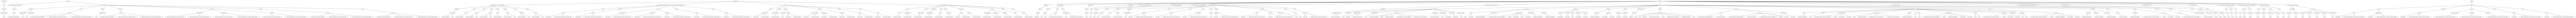

In [11]:
T = PG.AGraph()

for x in label_dictionary.keys():
    T.add_node(x, label=label_dictionary[x])
        
count = 0
while count < permutations.num_columns-1:
    permutations.apply((lambda x,y: T.add_edge(x,y)), [count,count+1])
    count += 1
      
T.write('ademo.dot')
T.layout(prog='dot')
T.draw('building time offering.png')
Image('building time offering.png')


In [12]:
#from PIL import Image as PImage
#im = PImage.open('substance_utensil_material_tree.png')
#im.show()

/anaconda/lib/python3.6/site-packages/datascience/tables.py:362: FutureWarning: column lists are deprecated; pass each as an argument
  "column lists are deprecated; pass each as an argument", FutureWarning)


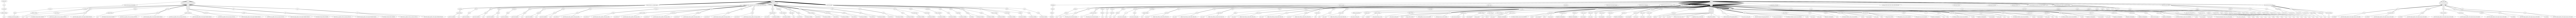

In [13]:
T = PG.AGraph(strict=False)

for x in label_dictionary.keys():
    T.add_node(x, label=label_dictionary[x])
    
count = 0
while count < permutations.num_columns-1:
    permutations.apply((lambda x,y: T.add_edge(x,y)), [count,count+1])
    count += 1
    
T.write('ademo.dot')
T.layout(prog='dot')
T.draw('building time offering weighted.png')
Image('building time offering weighted.png')

In [14]:
#im = PImage.open('weighted_substance_material_tree.png')
#im.show()

In [ ]:
T = PG.AGraph()

row = 0
while row < permutations.num_rows:
    count = 0
    while count < permutations.num_columns-1:
        original.apply((lambda x,y: T.add_edge(x, y)), [count,count+1])
        count += 1
    row+=1
    
T.write('ademo.dot')
T.layout(prog='dot')
T.draw('building time offering webbed.png')
Image('building time offering webbed.png')

/anaconda/lib/python3.6/site-packages/datascience/tables.py:362: FutureWarning: column lists are deprecated; pass each as an argument
  "column lists are deprecated; pass each as an argument", FutureWarning)


In [19]:
#from PIL import Image as PImage
#im = PImage.open("substance utensil web.png")
#im.show()